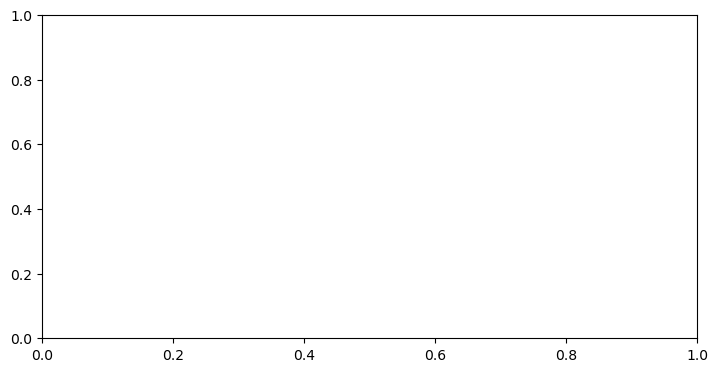

In [1]:
import tkinter as tk
from tkinter import messagebox, filedialog
import pickle
import numpy as np
import pandas as pd

# ------------------------------
# Load trained XGBoost model
# ------------------------------
try:
    with open("XGBoost_RCPT.pkl", "rb") as file:
        model = pickle.load(file)
except FileNotFoundError:
    messagebox.showerror("Error", "Trained model file 'XGBoost_RCPT.pkl' not found.")
    raise SystemExit

# ------------------------------
# GUI Window Setup
# ------------------------------
root = tk.Tk()
root.title("RCPT Prediction Tool")
root.geometry("550x550")
root.configure(bg="#f5f5f5")

# ------------------------------
# Input Section
# ------------------------------
fields = [
    "Cement (C1) (kg)",
    "Fly Ash (FA) (kg)",
    "Silica Fume (SF) (kg)",
    "Coarse Aggregate (CA) (kg)",
    "Fine Aggregate (kg)",
    "Water (W) (liter)",
    "Temperature (°C)"
]

entries = {}

input_frame = tk.LabelFrame(
    root,
    text="Mix Design Parameters",
    padx=20,
    pady=15,
    font=("Arial", 11, "bold"),
    bg="#f5f5f5"
)
input_frame.pack(padx=15, pady=10, fill="x")

for field in fields:
    row = tk.Frame(input_frame, bg="#f5f5f5")
    label = tk.Label(row, text=field + ":", width=25, anchor="w", bg="#f5f5f5")
    entry = tk.Entry(row, width=20)
    row.pack(fill="x", pady=4)
    label.pack(side="left")
    entry.pack(side="right", expand=True, fill="x")
    entries[field] = entry

# ------------------------------
# Prediction Display
# ------------------------------
result_frame = tk.Frame(root, bg="#f5f5f5")
result_frame.pack(pady=10)

tk.Label(
    result_frame,
    text="Predicted RCPT (Coulombs):",
    font=("Arial", 11, "bold"),
    bg="#f5f5f5"
).pack(side=tk.LEFT)

pred_label = tk.Label(
    result_frame,
    text="N/A",
    font=("Arial", 11),
    fg="blue",
    bg="#f5f5f5"
)
pred_label.pack(side=tk.LEFT, padx=10)

# ------------------------------
# Functions
# ------------------------------
def predict_rcpt():
    try:
        values = [float(entries[f].get()) for f in fields]
        input_data = np.array(values).reshape(1, -1)
        prediction = model.predict(input_data)[0]
        pred_label.config(text=f"{prediction:.2f}")
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter numeric values for all fields.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

def export_csv():
    try:
        values = [float(entries[f].get()) for f in fields]
        prediction = pred_label.cget("text")

        if prediction == "N/A":
            messagebox.showwarning("Warning", "Please predict RCPT before exporting.")
            return

        data = {f: [v] for f, v in zip(fields, values)}
        data["Predicted RCPT (Coulombs)"] = [float(prediction)]

        df = pd.DataFrame(data)

        file_path = filedialog.asksaveasfilename(
            defaultextension=".csv",
            filetypes=[("CSV files", "*.csv")]
        )
        if file_path:
            df.to_csv(file_path, index=False)
            messagebox.showinfo("Success", "Results exported successfully.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

def clear_inputs():
    for field in fields:
        entries[field].delete(0, tk.END)
    pred_label.config(text="N/A")

# ------------------------------
# Buttons
# ------------------------------
btn_frame = tk.Frame(root, bg="#f5f5f5")
btn_frame.pack(pady=15)

tk.Button(
    btn_frame,
    text="Predict RCPT",
    command=predict_rcpt,
    width=15,
    bg="#007acc",
    fg="white"
).pack(side=tk.LEFT, padx=5)

tk.Button(
    btn_frame,
    text="Export CSV",
    command=export_csv,
    width=15,
    bg="#6c757d",
    fg="white"
).pack(side=tk.LEFT, padx=5)

tk.Button(
    btn_frame,
    text="Clear Inputs",
    command=clear_inputs,
    width=15,
    bg="#dc3545",
    fg="white"
).pack(side=tk.LEFT, padx=5)

# ------------------------------
# Footer
# ------------------------------
tk.Label(
    root,
    text="RCPT Prediction Tool for Research Applications",
    font=("Arial", 9),
    bg="#f5f5f5",
    fg="#555"
).pack(side=tk.BOTTOM, pady=10)

# ------------------------------
# Run App
# ------------------------------
root.mainloop()
